1. Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars.  

In [1]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://www.amazon.in/")

In [5]:
user = input("THE PRODUCT DO YOU WANT:")
search = driver.find_element(By.XPATH,'//input[@id="twotabsearchtextbox"]')
search.send_keys(user)

THE PRODUCT DO YOU WANT:guitar


In [6]:
search = driver.find_element(By.XPATH,'//input[@id="nav-search-submit-button"]')
search.click()

2. In the above question, now scrape the following details of each product listed in first 3 pages of your search 
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
scrape all the products available under that product name. 
Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”.
In case, if any of the details are missing for any of the product then replace it by “-“.  

In [7]:
product_url = []
for pages in range(0,3):
    url = driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a')
    for i in url:
        product_url.append(i.get_attribute('href'))
    next_button  = driver.find_element(By.XPATH,'//span[@class="s-pagination-strip"]/a[3]')

In [8]:
len(product_url)

192

In [9]:
product_url

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyNjcxMjE0NjU2MTE1MDQ2OjE3MDgwODA5MDE6c3BfYXRmOjIwMDk2NjA4NzUwNDk4OjowOjo&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref%3Dsr_1_1%3Fcrid%3D3DEUO55FQF3JD%26keywords%3Dguitar%2Bguitar%26qid%3D1708080901%26sprefix%3Dguitarguitar%252Caps%252C264%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyNjcxMjE0NjU2MTE1MDQ2OjE3MDgwODA5MDE6c3BfYXRmOjMwMDAxNTUzNzk3OTIzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_2%3Fcrid%3D3DEUO55FQF3JD%26keywords%3Dguitar%2Bguitar%26qid%3D1708080901%26sprefix%3Dguitarguitar%252Caps%252C264%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyNjcxMjE0NjU2MTE1MDQ2OjE3MDgwODA5MDE6c3BfYXRmOjIwMDg4NDY1NDU5NDA0OjowOjo&url=%2FHenrix-Cutaway-Acoustic-Die-cast-Dual-action%2Fdp%2FB07VHSCGCG%2Fref%3Dsr_1_3%3Fcrid%3D3DEUO55FQF3JD%26keywor

In [10]:
Brand_Name=[]
Name_of_the_Product= []
Price=[]
Return_Exchange=[]
Expected_Delivery=[]
Availability=[]
for i in product_url:
    driver.get(i)
    
    try:
        brand_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/div/div[5]/div[3]/div[4]/div[47]/div/table/tbody/tr[1]/td[2]/span')))
        Brand_Name.append(brand_element.text)
    except:
        Brand_Name.append("-")
    
    try:
        product_name_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/div/div[5]/div[3]/div[4]/div[1]/div/h1/span')))
        Name_of_the_Product.append(product_name_element.text)
    except:
        Name_of_the_Product.append("-")
        
    try:
        price = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[1]/div/div/span[1]/span[2]/span[2]')))
        Price.append(price.text)
    except:
        Price.append("-")
    
    try:
        returnexc = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/div/div[5]/div[3]/div[4]/div[24]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')))
        Return_Exchange.append(returnexc.text)
    except:
        Return_Exchange.append("-")
        
    try:
        dele = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div/span/span[1]')))
        Expected_Delivery.append(dele.text)
    except:
        Expected_Delivery.append("-")
    
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[5]/div/div[1]/span')))
        Availability.append(ava.text)
    except:
        Availability.append("-")
        
driver.quit()

In [11]:
df = pd.DataFrame({'Brand_Name':Brand_Name,'Name_of_the_Product':Name_of_the_Product,'Price':Price,'Return/Exchange':Return_Exchange,'Expected_Delivery':Expected_Delivery,'Availability':Availability})
df

,Brand_Name,Name_of_the_Product,Price,Return/Exchange,Expected_Delivery,Availability
0,Kadence,Kadence Frontier guitar with Online Guitar lea...,"4,499",7 days Replacement,"Tuesday, 20 February",In stock
1,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","5,499",7 days Replacement,"Tuesday, 20 February",In stock
2,Henrix,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"3,099",7 days Replacement,"Saturday, 24 February",In stock
3,MOCKING BIRD,MOCKING BIRD 38 inch Acoustic Guitar for Begin...,"3,249",7 days Replacement,"Monday, 26 February",In stock
4,JUAREZ,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","2,199",7 days Replacement,"Saturday, 24 February",In stock
...,...,...,...,...,...,...
187,REVEL,Revel 38 Inches Cutaway Design Acoustic Guitar...,"1,879",7 days Replacement,"Saturday, 24 February",In stock
188,-,-,-,-,-,-
189,VAULT,Vault DA20 Dreadnought Acoustic Guitar With Gi...,"4,899",7 days Replacement,"Friday, 23 February",In stock
190,DEVICE OF URBAN INFOTECH,DEVICE OF URBAN INFOTECH 38 inch Acoustic Guit...,"3,299",7 days Replacement,"Tuesday, 27 February",In stock


In [12]:
df.to_csv('guitars.csv',index=False)

3. Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

Fruit Images: ['', '', '', '', '', '', '', '', '', '']

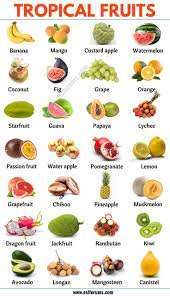
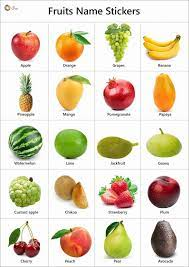
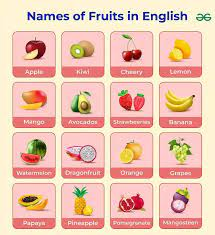
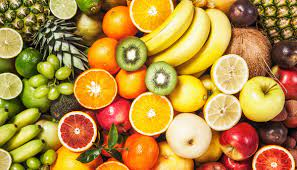
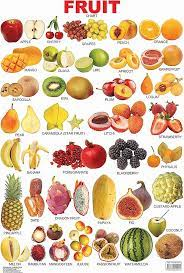
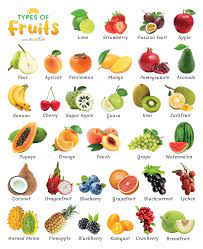
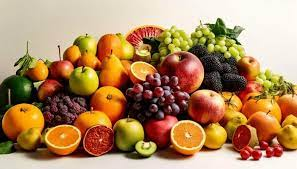
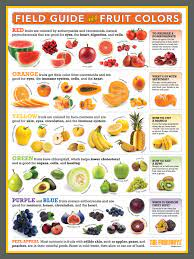
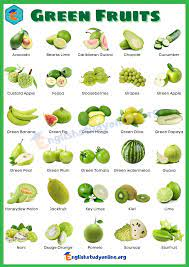
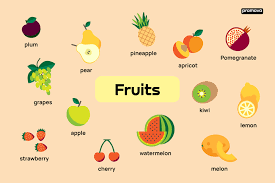

Cars Images: ['', '', '', '', '', '', '', '', '', '']

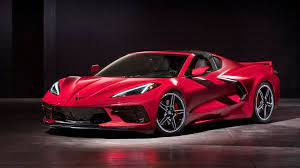
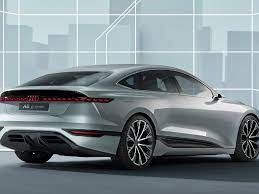
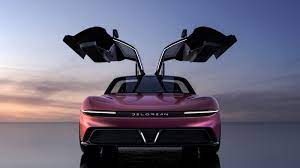
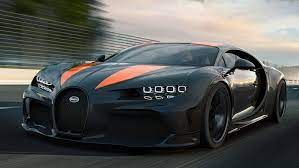
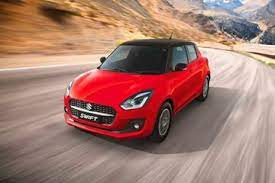
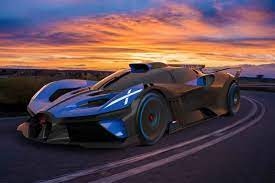
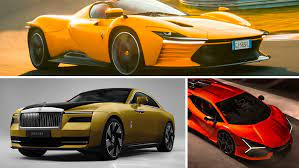
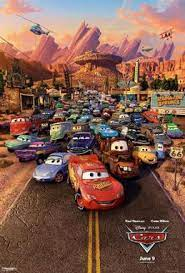
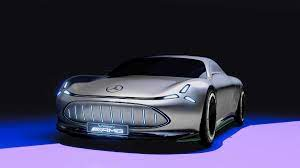
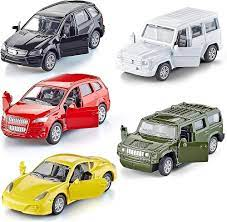

Machine Learning Images: ['', '', '', '', '', '', '', '', '', '']

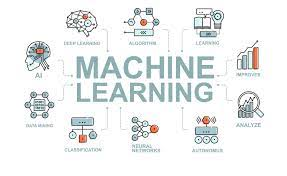
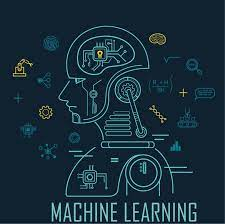
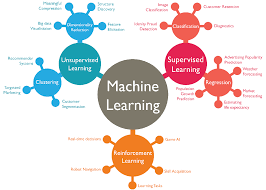
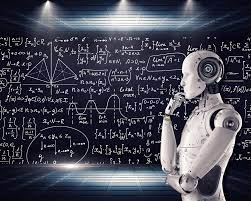
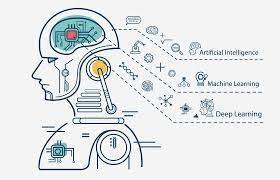
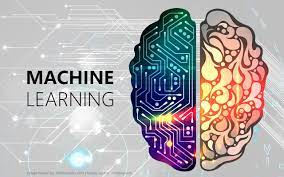
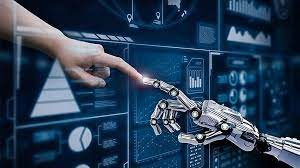
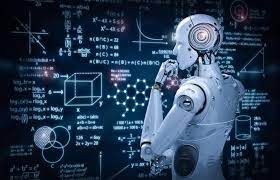
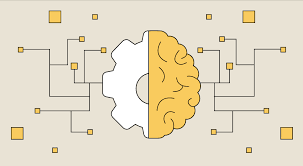
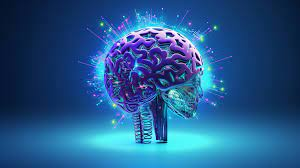

Guitar Images: ['', '', '', '', '', '', '', '', '', '']

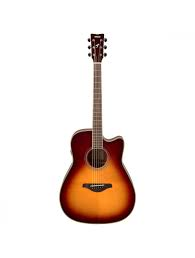
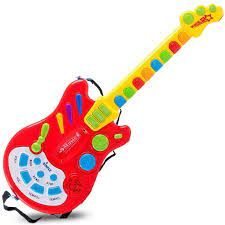
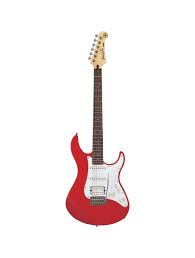
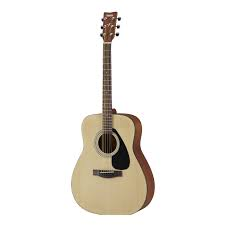
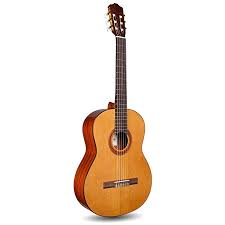
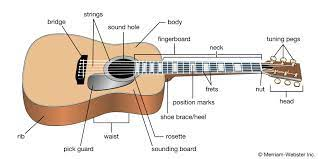
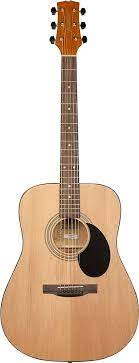
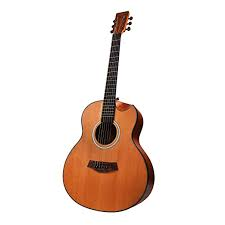
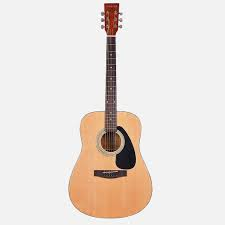
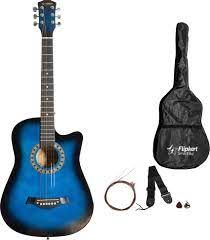

Cakes Images: ['', '', '', '', '', '', '', '', '', '']

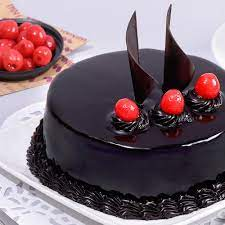
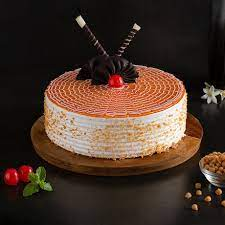
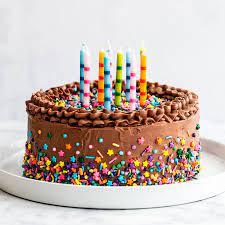
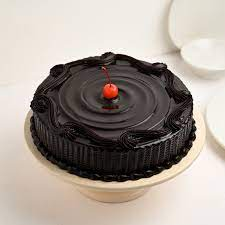
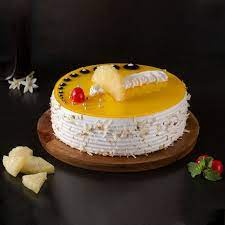
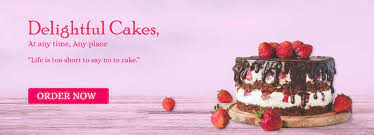
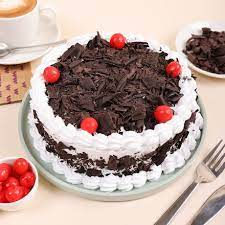
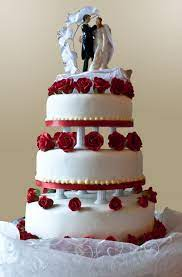
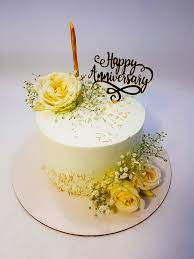
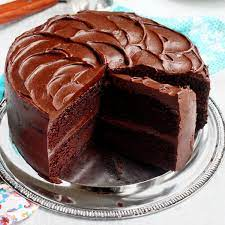

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--incognito')

driver = webdriver.Chrome()

keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']

def get_images(keyword):
    images = []
    results = driver.find_elements(By.XPATH, '//div[@class="fR600b islir"]/img')
    for img in results[:10]:
        images.append(img.get_attribute('src'))
    return images

for keyword in keywords:
    driver.get('https://images.google.com/')
    search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
    search.clear()
    search.send_keys(keyword)
    time.sleep(2) 
    search.submit()
    time.sleep(2) 
    if keyword == 'fruits':
        fruits_img = get_images(keyword)
        print("Fruit Images:", fruits_img)
        
    if keyword == 'cars':
        cars_img = get_images(keyword)
        print("Cars Images:", cars_img)
        
    if keyword == 'Machine Learning':
        machine_learning_img = get_images(keyword)
        print("Machine Learning Images:", machine_learning_img)
        
    if keyword == 'Guitar':
        guitar_img = get_images(keyword)
        print("Guitar Images:", guitar_img)
        
    if keyword == 'Cakes':
        cakes_img = get_images(keyword)
        print("Cakes Images:", cakes_img)
        

driver.quit()


In [25]:
df = pd.DataFrame({'Fruit Images':fruits_img,'Cars Images':cars_img,'Machine Learning Images':machine_learning_img,'Guitar Images':guitar_img,'Cakes Images':cakes_img})
df

,Fruit Images,Cars Images,Machine Learning Images,Guitar Images,Cakes Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com 
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,  
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV.  

In [51]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [52]:
driver = webdriver.Chrome()

In [53]:
driver.get("https://www.flipkart.com/")

In [54]:
search = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search.send_keys('Oneplus Nord')

button = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')
button.submit()

In [48]:
product_url = []
for pages in range(0,1):
    url = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
    for i in url:
        product_url.append(i.get_attribute('href'))
    

In [55]:
Brand_Name=[]
Name_of_the_Product= []
Price=[]
colour = []
storage = []
ramm = []
secondary_camera=[]
primeary_camera=[]
Display_size=[]
Battery_capacity=[]

for i in product_url:
    driver.get(i)
    
    try:
        brand_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')))
        Brand_Name.append(brand_element.text)
    except:
        Brand_Name.append("-")
    
    try:
        product_name_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[1]/table/tbody/tr[3]/td[2]/ul/li')))
        Name_of_the_Product.append(product_name_element.text)
    except:
        Name_of_the_Product.append("-")
        
    try:
        price = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')))
        Price.append(price.text)
    except:
        Price.append("-")
    
    try:
        color = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')))
        colour.append(color.text)
    except:
        colour.append("-")
        
    try:
        read_more = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/button')))
        read_more.click()
    except:
        pass
        
    try:
        storagee = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[4]/table/tbody/tr[1]/td[2]/ul')))
        storage.append(storagee.text)
    except:
        storage.append("-")
    
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul')))
        ramm.append(ava.text)
    except:
        ramm.append("-")
        
    try:
        avaa = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul')))
        secondary_camera.append(avaa.text)
    except:
        secondary_camera.append("-")
        
    try:
        av = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[5]/table/tbody/tr[1]/td[2]/ul')))
        primeary_camera.append(av.text)
    except:
        primeary_camera.append("-")
        
    try:
        va = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[2]/ul')))
        Display_size.append(va.text)
    except:
        Display_size.append("-")
        
    try:
        aa = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[7]/table/tbody/tr/td[2]/ul')))
        Battery_capacity.append(aa.text)
    except:
        Battery_capacity.append("-")
        
driver.quit()

In [56]:
df = pd.DataFrame({'Brand Name':Brand_Name, 'Smartphone name':Name_of_the_Product, 'Colour':colour, 'RAM':ramm, 'Storage(ROM)':storage, 'Primary Camera':primeary_camera, 'Secondary Camera':secondary_camera, 'Display Size':Display_size, 'Battery Capacity':Battery_capacity, 'Price':Price,'Product URL':product_url})
df

,Brand Name,Smartphone name,Colour,RAM,Storage(ROM),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
0,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB...",Nord CE 3 Lite 5G,Pastel Lime,8 GB,256 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹19,910",https://www.flipkart.com/oneplus-nord-ce-3-lit...
1,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",Nord CE 3 Lite 5G,Chromatic Gray,8 GB,256 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹19,788",https://www.flipkart.com/oneplus-nord-ce-3-lit...
2,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB...",Nord CE 3 Lite 5G,Pastel Lime,8 GB,128 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹18,231",https://www.flipkart.com/oneplus-nord-ce-3-lit...
3,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...",Nord CE 3 Lite 5G,Chromatic Gray,8 GB,128 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹18,229",https://www.flipkart.com/oneplus-nord-ce-3-lit...
4,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",Nord CE 3 Lite 5G,Chromatic Gray,8 GB,256 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹20,154",https://www.flipkart.com/oneplus-nord-ce-3-lit...
5,"OnePlus Nord CE 3 Lite 5G (Pastel lime, 256 GB...",Nord CE 3 Lite 5G,Pastel lime,8 GB,256 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹19,975",https://www.flipkart.com/oneplus-nord-ce-3-lit...
6,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nord CE 2 Lite 5G,Blue Tide,6 GB,128 GB,64MP Rear Camera,16MP Front Camera,16.74 cm (6.59 inch),5000 mAh,"₹18,155",https://www.flipkart.com/oneplus-nord-ce-2-lit...
7,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...",-,-,-,-,-,-,-,-,"₹18,957",https://www.flipkart.com/oneplus-nord-ce-3-lit...
8,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...",-,-,-,-,-,-,-,-,"₹17,657",https://www.flipkart.com/oneplus-nord-ce-2-lit...
9,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB...",-,-,-,-,-,-,-,-,"₹18,394",https://www.flipkart.com/oneplus-nord-ce-3-lit...


In [57]:
df.to_csv('smartphone.csv',index=False)

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [10]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [11]:
driver = webdriver.Chrome()

In [12]:
driver.get("https://www.googlemaps.com/")

In [13]:
search = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
search.send_keys('Bhubaneswar')

button = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button')
button.click()

In [17]:
cordinate = []
google = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[23]/div[1]/div[2]/div[2]/div/div[2]/div[3]/button')
cordinate.append(google.text)

In [18]:
cordinate

['20.295481, 85.799922']

 6. Write a program to scrap all the available details of best gaming laptops from digit.in.  

In [22]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [23]:
driver = webdriver.Chrome()

In [24]:
driver.get("https://www.digit.in/")

In [25]:
gaming = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div/div/div/article/div/div/div/div[2]/div/div[1]/div[3]/div[1]/div[1]/div[1]/div[1]/a')
gaming.click()

In [26]:
gaming_lapi_url = []
lapi_url = driver.find_elements(By.XPATH,'//div[@class="rh_gr_top_middle mb10 colored_rate_bar"]/h3/a')
for i in lapi_url:
    gaming_lapi_url.append(i.get_attribute('href'))

In [37]:
Brand_Name=[]
Name_of_the_Product= []
types=[]
ossy=[]
connectivity=[]
raam=[]
Boost_Clock_Speed = []
cores= []
graphics= []
processor= []
Storage= []
drive_type= []
battery= []
power= []
price= []



for i in gaming_lapi_url:
    driver.get(i)
    
    try:
        brand_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[1]/div[4]/div[8]/div/div[2]')))
        Brand_Name.append(brand_element.text)
    except:
        Brand_Name.append("-")
    
    try:
        product_name_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[2]/td/table/tbody/tr[3]/td')))
        Name_of_the_Product.append(product_name_element.text)
    except:
        Name_of_the_Product.append("-")
        

    try:
        returnexc = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[2]/td/table/tbody/tr[1]/td')))
        ossys.append(returnexc.text)
    except:
        ossy.append("-")
        
    try:
        dele = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[6]/td/table/tbody/tr/td')))
        connectivity.append(dele.text)
    except:
        connectivity.append("-")
    
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[8]/td/table/tbody/tr[1]/td')))
        raam.append(ava.text)
    except:
        raam.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[10]/td/table/tbody/tr[1]/td')))
        Boost_Clock_Speed.append(ava.text)
    except:
        Boost_Clock_Speed.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[10]/td/table/tbody/tr[3]/td')))
        cores.append(ava.text)
    except:
        cores.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[10]/td/table/tbody/tr[4]/td')))
        graphics.append(ava.text)
    except:
        graphics.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[10]/td/table/tbody/tr[5]/td')))
        processor.append(ava.text)
    except:
        processor.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[12]/td/table/tbody/tr[1]/td')))
        Storage.append(ava.text)
    except:
        Storage.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[12]/td/table/tbody/tr[2]/td')))
        drive_type.append(ava.text)
    except:
        drive_type.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[14]/td/table/tbody/tr[1]/td')))
        battery.append(ava.text)
    except:
        battery.append("-")
        
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div[3]/div/div/div/div/div[2]/div[4]/div/div[2]/table/tbody/tr[14]/td/table/tbody/tr[2]/td')))
        power.append(ava.text)
    except:
        power.append("-")
        

        
        
        
        
driver.quit()

In [45]:
df = pd.DataFrame({'Brand_Name':Brand_Name,'Model Name':Name_of_the_Product,'Connectivity':connectivity,'RAM':raam,'Boost_Clock_Speed':Boost_Clock_Speed,'Cores':cores,'Graphics':graphics,'Processor':processor,'Storage':Storage,'Storage Type':drive_type,'Battery':battery,'Battery Power':power,'Product Link':gaming_lapi_url})
df

,Brand_Name,Model Name,Connectivity,RAM,Boost_Clock_Speed,Cores,Graphics,Processor,Storage,Storage Type,Battery,Battery Power,Product Link
0,MSI,-,"Bluetooth, Wi-Fi",32 GB,Intel Arc,-,-,-,1 TB,SSD,"4 Cell, 99.9 WHr",100 W,https://www.digit.in/laptops/prestige-16-ai-ev...
1,Asus,ROG Zephyrus G14,"Bluetooth, Wi-Fi",32 GB,5.2 GHz,8,NVIDIA GeForce RTX 4080,"7th Gen, AMD Ryzen 9 7940HS",1 TB,SSD,"4 Cell, 76 WHr",240W,https://www.digit.in/laptops/asus-rog-zephyrus...
2,Acer,-,"Bluetooth, Wi-Fi",32 GB,2.3 GHz,NVIDIA GeForce RTX 4060,Intel Core Ultra 9 185H,-,1 TB,SSD,-,-,https://www.digit.in/laptops/acer-predator-tri...
3,Asus,-,"Bluetooth, Wi-Fi",32 GB,4.80 GHz,16,Intel ARC IGP,Intel Core Ultra 7-155H,1 TB,SSD,"4 Cell, 75 WHr",65 W,https://www.digit.in/laptops/asus-zenbook-14-o...
4,HP,16-aa0664TX,"Bluetooth, Wi-Fi",32 GB,4.8 GHz,16,Intel Arc,Intel Core Ultra 7-155H,1 TB,SSD,"6 Cell, 83 WHr",140 W,https://www.digit.in/laptops/hp-spectre-x360-1...
5,Lenovo,-,"Bluetooth, Wi-Fi",16 GB,4.8 GHz,Intel Core Ultra 7-155H,-,-,512 GB,SSD,"4 Cell, 84 WHr",100 W,https://www.digit.in/laptops/lenovo-ideapad-pr...
6,Acer,Nitro 16,"Bluetooth, Wi-Fi",16 GB,8,AMD Ryzen 7-7840HS,-,-,512 GB,SSD,"4 Cell, 90 WHr",330 W,https://www.digit.in/laptops/acer-nitro-v-16-a...
7,Acer,Swift Go 14,"Bluetooth, Wi-Fi",16 GB,4.8 GHz,16,Intel Arc,Intel Core Ultra 7-155H,1 TB,SSD,"3 Cell, 65 WHr",100 W,https://www.digit.in/laptops/acer-swift-go-14-...


7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [4]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [5]:
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--incognito')

In [6]:
driver = webdriver.Chrome()

In [7]:
driver.get("https://www.forbes.com/")

In [8]:
menu = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div')
menu.click()

In [9]:
bill = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]')
bill.click()

In [10]:
worlds = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a')
worlds.click()

In [ ]:
rank=[]
name=[]
nw=[]
age=[]
citizen = []
source=[]
industry=[]

for page in range(0,14):
    try:
        ranks = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"]/div[1]') 
        for i in ranks:
            rank.append(i.text)
    except:
        rank.append("-")
        
    try:
        names = driver.find_element(By.XPATH,'') 
        for i in ranks:
            name.append(i.text)
    except:
        rank.append("-")
        
    try:
        nws= driver.find_element(By.XPATH,'') 
        for i in nws:
            nw.append(i.text)
    except:
        nw.append("-")
        
    try:
        ages = driver.find_element(By.XPATH,'') 
        for i in ages:
            age.append(i.text)
    except:
        age.append("-")
        
    try:
        citizens = driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div/div[5]') 
        for i in citizens:
            citizen.append(i.text)
    except:
        citizen.append("-")
        
    try:
        sources = driver.find_element(By.XPATH,'') 
        for i in sources:
            source.append(i.text)
    except:
        source.append("-")
        
    try:
        industrys = driver.find_element(By.XPATH,'') 
        for i in industrys:
            industry.append(i.text)
    except:
        industry.append("-")
        
    
        
    next_ = driver.find_element(By.XPATH,f'//button[@aria-label="go to page { page }"]')
    next_.click()
     

In [26]:
citizen

['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

In [25]:
rank

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video

In [31]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [32]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--incognito')

driver = webdriver.Chrome(options=chrome_options)

In [33]:
driver.get("https://www.youtube.com/")

In [34]:
video = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/form/div[1]/div[1]/input')
video.send_keys('Kingdom of the Planet of the Apes')
dyn = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button')
dyn.click()


In [35]:
clc = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a')
clc.click()

In [36]:
cmnt = []
try:
    cmt = driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]')
    for i in cmt[0:500]:
        cmnt.append(i.text)
except:
    cmnt.append("-")
cmnt

['God… I feel like a kid again anticipating a movie to hit theater.',
 'one of the rare times where movies in a franchise are consistently so good',
 'Loved the reboots. Hope this keeps with good story ',
 "I'm mind blown at how a movie about talking apes can be so captivating. The power of good characterization and good storytelling.",
 'This is probably the most underrated modern film franchise',
 "I'm 53 and was obsessed with the original franchise in the 70s as a kid. I'm glad I lived to see it be rebooted. These movies are amazing and it may be the best franchise ever created.\n\nI just hope, we as fans, get to see the franchise come full circle and it ends (or starts a new trilogy) with a remake of the 1968 movie. ",
 'Looks like we are finally getting closer to the 1968 original timeline! Looks amazing!',
 'This seems to be the only film franchise that has been handled and produced with respect to itself and the fans. I really can’t wait to see this one ',
 'A descendant of Caes

In [37]:
len(cmnt)

500

In [38]:
vote = []

vt = driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for i in vt[0:500]:
    try:
        vote.append(i.text)
    except:
        vote.append("-")
vote

['',
 '16K',
 '',
 '',
 '4K',
 '',
 '',
 '97',
 '',
 '',
 '291',
 '',
 '',
 '946',
 '',
 '',
 '25',
 '',
 '',
 '4.9K',
 '',
 '',
 '1.1K',
 '',
 '',
 '980',
 '',
 '',
 '53',
 '',
 '',
 '42',
 '',
 '',
 '9',
 '',
 '',
 '12K',
 '',
 '',
 '117',
 '',
 '',
 '305',
 '',
 '',
 '9',
 '',
 '',
 '94',
 '',
 '',
 '18',
 '',
 '',
 '818',
 '',
 '',
 '187',
 '',
 '',
 '184',
 '',
 '',
 '8',
 '',
 '',
 '39',
 '',
 '',
 '4',
 '',
 '',
 '2.6K',
 '',
 '',
 '55',
 '',
 '',
 '27',
 '',
 '',
 '15',
 '',
 '',
 '135',
 '',
 '',
 '3',
 '',
 '',
 '2.3K',
 '',
 '',
 '31',
 '',
 '',
 '51',
 '',
 '',
 '2',
 '',
 '',
 '26',
 '',
 '',
 '2',
 '',
 '',
 '1.6K',
 '',
 '',
 '15',
 '',
 '',
 '13',
 '',
 '',
 '7',
 '',
 '',
 '150',
 '',
 '',
 '6',
 '',
 '',
 '304',
 '',
 '',
 '14',
 '',
 '',
 '14',
 '',
 '',
 '3',
 '',
 '',
 '995',
 '',
 '',
 '9',
 '',
 '',
 '2',
 '',
 '',
 '3',
 '',
 '',
 '7',
 '',
 '',
 '1',
 '',
 '',
 '1.3K',
 '',
 '',
 '10',
 '',
 '',
 '1',
 '',
 '',
 '3',
 '',
 '',
 '2.2K',
 '',
 '',
 '9',
 '',
 '',

In [39]:
len(vote)

500

In [40]:
time = []
t = driver.find_elements(By.XPATH,'//yt-formatted-string[@class="published-time-text style-scope ytd-comment-renderer"]/a')
for i in t[0:500]:
    try:
        time.append(i.text)
    except:
        time.append("-")
time
driver.quit()

In [41]:
len(time)

500

9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description.

In [55]:
import selenium
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.by import By

In [56]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--incognito')

driver = webdriver.Chrome(options=chrome_options)

In [57]:
driver.get("https://www.hostelworld.com/")

In [64]:
loc = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
loc.send_keys('London')

In [65]:
sub = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button')
sub.click()

In [66]:
go = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[2]')
go.click()

In [78]:
product_url = []
for pages in range(1,4):
    url = driver.find_elements(By.XPATH,'//a[@class="nuxt-link"]')
    for i in url:
        product_url.append(i.get_attribute('href'))
    next_button  = driver.find_element(By.XPATH,f'//div[@class="page-wrapper"][{ pages }]')


In [79]:
hotel_name = []
distance = []
rating = []
t_r=[]
o_r=[]
private=[]
dorm=[]
fac=[]
pd=[]


for i in product_url:
    driver.get(i)
    
    try:
        brand_element = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[4]/div/div[1]/h1/div')))
        hotel_name.append(brand_element.text)
    except:
        hotel_name.append("-")
        
    try:
        price = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[1]/div[1]')))
        rating.append(price.text)
    except:
        rating.append("-")
    
    try:
        color = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[1]/div[2]/div[2]')))
        t_r.append(color.text)
    except:
        t_r.append("-")
        
        
    try:
        storagee = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[1]/div[2]/div[1]/span')))
        o_r.append(storagee.text)
    except:
        o_r.append("-")
    
    try:
        ava = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[10]/div/div/section/div/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[2]/div/div[1]/div[2]/div[1]')))
        private.append(ava.text)
    except:
        private.append("-")
        
    try:
        avaa = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[10]/div/div/section/div/div[1]/div/div[2]/div[2]/div[1]/div[2]/div[2]/div/div[1]/div[2]/div[1]')))
        dorm.append(avaa.text)
    except:
        dorm.append("-")
        
    try:
        av = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[12]/div/ul/li[1]/ul')))
        fac.append(av.text)
    except:
        fac.append("-")
        
    try:
        va = WebDriverWait(driver, 0.1).until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[2]/div[3]/div/div[2]')))
        pd.append(va.text)
    except:
        pd.append("-")

In [81]:
product_url = []
for pages in range(1,4):
    url = driver.find_elements(By.XPATH,'//div[@class="property-distance"]/span[2]')
    for i in url:
        product_url.append(i.text)
    next_button  = driver.find_element(By.XPATH,f'//div[@class="page-wrapper"][{ pages }]')

In [82]:
product_url

['- 3.6km from city centre',
 '- 6.5km from city centre',
 '- 1.8km from city centre',
 '- 5.4km from city centre',
 '- 5.5km from city centre',
 '- 3km from city centre',
 '- 0.7km from city centre',
 '- 4.3km from city centre',
 '- 1.7km from city centre',
 '- 2.2km from city centre',
 '- 9km from city centre',
 '- 3.2km from city centre',
 '- 10km from city centre',
 '- 2.6km from city centre',
 '- 5.8km from city centre',
 '- 0.2km from city centre',
 '- 5km from city centre',
 '- 2.1km from city centre',
 '- 5.7km from city centre',
 '- 1.7km from city centre',
 '- 3.6km from city centre',
 '- 5.1km from city centre',
 '- 11.9km from city centre',
 '- 4.4km from city centre',
 '- 3.3km from city centre',
 '- 4.9km from city centre',
 '- 1.8km from city centre',
 '- 1.8km from city centre',
 '- 7.5km from city centre',
 '- 4.2km from city centre',
 '- 3.6km from city centre',
 '- 6.5km from city centre',
 '- 1.8km from city centre',
 '- 5.4km from city centre',
 '- 5.5km from city 

In [83]:
print(hotel_name)

['-', 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", "Wombat's City Hostel London", 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", 'Urbany Hostel London', 'Onefam Notting Hill', 'Generator London', 'Onefam Waterloo', 'Astor Hyde Park', 'Safestay London Elephant & Castle', 'Astor Museum Inn', 'No.8 Seven Sisters', 'Clink261', 'No.8 Willesden Hostel London', 'Smart Russell Square Hostel', 'Safestay London Kensington Holland Park', 'The Walrus Hostel', 'Smart Hyde Park Inn Hostel', 'YHA London Oxford Street', 'Queen Elizabeth Chelsea', 'Destinations Hostels @ The Gallery', 'Prime Backpackers Angel', 'Hostelle - women only hostel London', 'London Backpackers', 'Smart Camden Inn Hostel', 'Kabannas London St Pancras', 'Astor Kensington', "St Christopher's Inn - London Bridge", 'Astor Victoria', "St Christopher's Hammersmith", 'Phoenix Hostel', "Wombat's City Hostel London", 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", "Wombat's City Hostel London",

In [84]:
print(rating)

['9.1', '8.8', '7.8', '9.1', '8.8', '7.8', '9.5', '9.6', '7.5', '9.6', '8.2', '7.3', '8.4', '7.7', '8.0', '7.1', '7.6', '6.9', '7.9', '7.8', '9.0', '7.5', '9.1', '8.7', '8.8', '8.1', '8.4', '8.2', '8.5', '8.0', '7.2', '7.5', '6.3', '9.1', '8.8', '7.8', '9.1', '8.8', '7.8', '9.5', '9.6', '7.5', '9.6', '8.2', '7.3', '8.4', '7.7', '8.0', '7.1', '7.6', '6.9', '7.9', '7.8', '9.0', '7.5', '9.1', '8.7', '8.8', '8.1', '8.4', '8.2', '8.5', '8.0', '7.2', '7.5', '6.3', '9.1', '8.8', '7.8', '9.1', '8.8', '7.8', '9.5', '9.6', '7.5', '9.6', '8.2', '7.3', '8.4', '7.7', '8.0', '7.1', '7.6', '6.9', '7.9', '7.8', '9.0', '7.5', '9.1', '8.7', '8.8', '8.1', '8.4', '8.2', '8.5', '8.0', '7.2', '7.5', '6.3']


In [85]:
print(t_r)

['15924 Total Reviews', '15982 Total Reviews', '12880 Total Reviews', '15924 Total Reviews', '15982 Total Reviews', '12880 Total Reviews', '1130 Total Reviews', '2606 Total Reviews', '8090 Total Reviews', '151 Total Reviews', '12332 Total Reviews', '5284 Total Reviews', '9458 Total Reviews', '4180 Total Reviews', '522 Total Reviews', '5207 Total Reviews', '10213 Total Reviews', '1787 Total Reviews', '4304 Total Reviews', '6803 Total Reviews', '4704 Total Reviews', '3692 Total Reviews', '320 Total Reviews', '873 Total Reviews', '122 Total Reviews', '4568 Total Reviews', '3145 Total Reviews', '2978 Total Reviews', '6596 Total Reviews', '3605 Total Reviews', '15100 Total Reviews', '4391 Total Reviews', '4625 Total Reviews', '15924 Total Reviews', '15982 Total Reviews', '12880 Total Reviews', '15924 Total Reviews', '15982 Total Reviews', '12880 Total Reviews', '1130 Total Reviews', '2606 Total Reviews', '8090 Total Reviews', '151 Total Reviews', '12332 Total Reviews', '5284 Total Reviews',

In [86]:
print(o_r)

['Superb', 'Fabulous', 'Very Good', 'Superb', 'Fabulous', 'Very Good', 'Superb', 'Superb', 'Very Good', 'Superb', 'Fabulous', 'Very Good', 'Fabulous', 'Very Good', 'Fabulous', 'Very Good', 'Very Good', 'Good', 'Very Good', 'Very Good', 'Superb', 'Very Good', 'Superb', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Very Good', 'Very Good', 'Good', 'Superb', 'Fabulous', 'Very Good', 'Superb', 'Fabulous', 'Very Good', 'Superb', 'Superb', 'Very Good', 'Superb', 'Fabulous', 'Very Good', 'Fabulous', 'Very Good', 'Fabulous', 'Very Good', 'Very Good', 'Good', 'Very Good', 'Very Good', 'Superb', 'Very Good', 'Superb', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Fabulous', 'Very Good', 'Very Good', 'Good', 'Superb', 'Fabulous', 'Very Good', 'Superb', 'Fabulous', 'Very Good', 'Superb', 'Superb', 'Very Good', 'Superb', 'Fabulous', 'Very Good', 'Fabulous', 'Very Good', 'Fabulous', 'Very Good', 'Very Good', 'Good', 'Very Good', 'Very

In [89]:
print(fac)

['Linen Included Free City Maps Free WiFi Free Internet Access', '-', 'Linen Included Free WiFi Free Internet Access', 'Linen Included Free City Maps Free WiFi Free Internet Access', '-', 'Linen Included Free WiFi Free Internet Access', 'Linen Included Free WiFi', 'Linen Included Free WiFi Free Internet Access', 'Linen Included Free City Maps Free WiFi Free Internet Access', 'Linen Included Free WiFi Free Internet Access', 'Linen Included Free City Maps Free WiFi Free Internet Access', 'Linen Included Free WiFi', 'Linen Included Free City Maps Free WiFi', 'Linen Included Free WiFi', 'Linen Included Free City Maps Free WiFi', 'Linen Included Free WiFi', 'Linen Included Free City Maps Free WiFi Free Internet Access Free City Tour', 'Linen Included Free WiFi', 'Linen Included Free City Maps Free WiFi Free Internet Access', 'Linen Included Free City Maps Free WiFi Free Internet Access', 'Linen Included Free WiFi', 'Linen Included Free City Maps Free WiFi Free Internet Access', 'Free Breakf

In [90]:
print(pd)

["A safe haven in the middle of the metropolis: We took a traditional brick building with roots dating back to the 1800s and set a new standard for hostel life in the UK.\nWhat was once sailors' accommodation is now a hostel that caters for all the needs of the modern traveller. With great attention to detail, we have created a hostel in London that celebrates the heritage of our historic building.\nThe old oak that once formed part of sturdy ships and churches is now immortalised in our furnishings throughout the house. The beers you drink here will be served on a bar made from 500 year old wood!\n\nOur Wombat's City Hostel is located in the London Borough of Tower Hamlets, right next to the famous Tower Bridge and Tower of London, charming markets, authentic pubs and many other places of historical interest.\nA short walk will take you to trendy Shoreditch with its vibrant street art, the lively nightlife of Hoxton Square and Old Street and finally Brick Lane, which has become one of